# Exploring Why Civil Resistance Works

> *student name:* **Odysseas Spyropoulos**<br />


* This assignment involves replicating findings from [Why Civil Resistance Works](https://www.ericachenoweth.com/research/wcrw) by [Erical Chenoweth](https://www.ericachenoweth.com/) and Maria J. Stephan.
* It demonstrates that **nonviolent campaigns tend to be more effective than violent ones**
* With a specific focus on exploring the 3.5% rule stating that *no government has withstood a challenge when 3.5% of the population mobilizes against it*.

* Let's import all the libraries that we will need! (in retrospect)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotnine import *

* We will start by reading the [NAVCO 1.2 Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0UZOTX)

In [2]:
navco = pd.read_table('NAVCO 1.2 Updated.tab')
navco

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP
0,4.0,Afghans,Afghanistan,1978.0,1979.0,Afghan government,1.0,0.0,0.0,0.0,...,0.0,613.0,10000.0,0.000641,1.0,1.0,NaN,1.0,1.0,1.0
1,3.0,Afghan resistance,Afghanistan,1980.0,1989.0,Soviet occupation,1.0,0.0,0.0,0.0,...,0.0,3281.0,10000.0,0.000685,1.0,0.0,NaN,1.0,0.0,1.0
2,218.0,Taliban/anti-government forces,Afghanistan,1992.0,1996.0,Afghan regime,1.0,0.0,0.0,0.0,...,0.0,1370.0,20000.0,0.000893,1.0,0.0,NaN,1.0,0.0,0.0
3,217.0,Taliban,Afghanistan,2001.0,2014.0,Afghan government,0.0,0.0,1.0,1.0,...,0.0,4391.0,60000.0,0.001625,1.0,1.0,NaN,1.0,1.0,0.0
4,5.0,Albanian anti-communist,Albania,1990.0,1991.0,Communist regime,1.0,0.0,0.0,0.0,...,0.0,442.0,300000.0,0.091068,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Let's check the columns

In [3]:
navco.columns

Index(['NAVCOID', 'CAMPAIGN', 'LOCATION', 'BYEAR', 'EYEAR', 'TARGET',
       'SUCCESS', 'LIMITED', 'FAILURE', 'ONGOING', 'NONVIOL', 'VIOL',
       'REGCHANGE', 'FSELFDET', 'SECESSION', 'OTHER', 'DURATION',
       'PARTICIPATION', 'PERCENTAGEPOPULARPARTICIPATION', 'REGVIOL', 'DEFECT',
       'VIOLENTFLANK', 'VIOLSIM', 'REGAID', 'STATESUP'],
      dtype='object')

* We read the [1.2 Codebook](https://gdcc.github.io/dataverse-previewers/previewers/v1.3/PDFPreview.html?fileid=3621197&siteUrl=https://dataverse.harvard.edu&datasetid=3612156&datasetversion=2.0&locale=en) to understand each column

## 0. Data Cleansing

* After understanding the data and the context (via the [Q&A pdf](https://carrcenter.hks.harvard.edu/files/cchr/files/CCDP_005.pdf)) 
* We will cleanse them!
* With a first view, something seems weird with the last rows

In [4]:
# We deactivate the rows and columns limit, to better understand the problem
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# We want to see the last 480 lines
navco.tail(480)

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP
382,78.0,FLNC,Zaire/DRC,1977.0,1978.0,DRC/Zaire regime,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,293.0,4000.0,0.000151,1.0,0.0,NaN,0.0,0.0,0.0
383,189.0,Sacred Union,Zaire/DRC,1991.0,1993.0,Mobutu regime,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,864.0,1000.0,0.000026,1.0,0.0,NaN,1.0,0.0,0.0
384,249.0,Zambian independence movement,Zambia,1961.0,1963.0,British rule,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,913.0,1000000.0,0.285063,0.0,1.0,0.0,0.0,0.0,0.0
385,248.0,Zambia anti-single party rule,Zambia,1990.0,1991.0,One-party rule,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,488.0,23000.0,0.002791,1.0,0.0,0.0,1.0,0.0,0.0
386,12.0,anti-Chiluba campaign,Zambia,2001.0,2001.0,Chiluba regime,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,213.0,3000.0,0.000277,0.0,0.0,0.0,0.0,0.0,0.0
387,250.0,Zimbabwe African People's Union,Zimbabwe,1972.0,1979.0,Smith/Muzorena regime,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2556.0,1000.0,0.000145,1.0,0.0,NaN,0.0,1.0,0.0
388,161.0,PF-ZAPU guerillas,Zimbabwe,1983.0,1987.0,Mugabe regime,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1821.0,5000.0,0.000542,1.0,0.0,NaN,0.0,0.0,0.0
389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* We will reset the rows limit
* But not the columns, because we want to see every variable each time

In [5]:
pd.reset_option('max_rows')

* We see that there are many empty rows in our Dataframe
* We will delete them

In [6]:
# Take the rows (campaigns), where the id of the campaign is not NaN
row_not_nan = navco.NAVCOID.notna()

# Filter out the rest
navco = navco[row_not_nan]
navco

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP
0,4.0,Afghans,Afghanistan,1978.0,1979.0,Afghan government,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,613.0,10000.0,0.000641,1.0,1.0,NaN,1.0,1.0,1.0
1,3.0,Afghan resistance,Afghanistan,1980.0,1989.0,Soviet occupation,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3281.0,10000.0,0.000685,1.0,0.0,NaN,1.0,0.0,1.0
2,218.0,Taliban/anti-government forces,Afghanistan,1992.0,1996.0,Afghan regime,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1370.0,20000.0,0.000893,1.0,0.0,NaN,1.0,0.0,0.0
3,217.0,Taliban,Afghanistan,2001.0,2014.0,Afghan government,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4391.0,60000.0,0.001625,1.0,1.0,NaN,1.0,1.0,0.0
4,5.0,Albanian anti-communist,Albania,1990.0,1991.0,Communist regime,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,442.0,300000.0,0.091068,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,249.0,Zambian independence movement,Zambia,1961.0,1963.0,British rule,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,913.0,1000000.0,0.285063,0.0,1.0,0.0,0.0,0.0,0.0
385,248.0,Zambia anti-single party rule,Zambia,1990.0,1991.0,One-party rule,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,488.0,23000.0,0.002791,1.0,0.0,0.0,1.0,0.0,0.0
386,12.0,anti-Chiluba campaign,Zambia,2001.0,2001.0,Chiluba regime,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,213.0,3000.0,0.000277,0.0,0.0,0.0,0.0,0.0,0.0
387,250.0,Zimbabwe African People's Union,Zimbabwe,1972.0,1979.0,Smith/Muzorena regime,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2556.0,1000.0,0.000145,1.0,0.0,NaN,0.0,1.0,0.0


* We still have some NaN values (in `VIOLENTFLANK` and `VIOLSIM`), but these does not affect us.
* Lastly, we will check the behavior of each variable.

In [7]:
navco.describe()

,NAVCOID,BYEAR,EYEAR,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP
count,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,3.800000e+02,389.000000,389.000000,389.000000,177.000000,388.000000,389.000000,389.000000
mean,208.239075,1983.218509,1988.946015,0.385604,0.113111,0.501285,0.095116,0.434447,0.565553,0.691517,0.133676,0.154242,0.020566,2142.172237,1.692959e+05,0.010449,0.904884,0.272494,0.327684,0.389175,0.339332,0.269923
std,120.296999,19.447552,19.702678,0.487365,0.317136,0.500642,0.293752,0.496323,0.496323,0.462462,0.340742,0.361645,0.142107,3269.967566,8.904774e+05,0.039073,0.293752,0.445816,0.470700,0.488193,0.474092,0.444491
min,1.000000,1945.000000,1946.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,7.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,107.000000,1968.000000,1975.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,171.000000,4.725000e+03,0.000249,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,207.000000,1987.000000,1991.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,925.000000,1.500000e+04,0.001183,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,309.000000,1999.000000,2006.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2522.000000,7.075000e+04,0.005183,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,435.000000,2013.000000,2014.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22875.000000,1.400000e+07,0.450129,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* Each variable seems normal.
* The DataFrame in general seems right.
* Let's move on to the requests!

## 1. Exploration of Historical Trends

* For the **first part** of this section
* We will *create a plot showing **the frequency of nonviolent and violent campaigns**; the frequency should be counted **based on their** end years, at **decades**. The violent and nonviolent campaign counts should be stacked on each other.*

* It is apparent that we will primarily use the `NONVIOL` and/or the `VIOL` column. 
* So, to be sure, we will check that **nonviolent** and **violent** campaigns are not in conflict

In [8]:
# Check both columns for conflict
nonviol_nonviolent_count = len(navco[navco['NONVIOL'] == 1])
viol_nonviolent_count = len(navco[navco['VIOL'] == 0])
nonviol_violent_count = len(navco[navco['NONVIOL'] == 0])
viol_violent_count = len(navco[navco['VIOL'] == 1])

print(f'Nonviolent campaigns (NONVIOL==1): {nonviol_nonviolent_count}')
print(f'Nonviolent campaigns (VIOL==0): {viol_nonviolent_count}')
print(f'Violent campaigns (NONVIOL==0): {nonviol_violent_count}')
print(f'Violent campaigns (VIOL==1): {viol_violent_count}')

Nonviolent campaigns (NONVIOL==1): 169
Nonviolent campaigns (VIOL==0): 169
Violent campaigns (NONVIOL==0): 220
Violent campaigns (VIOL==1): 220


* Everything seems fine!
* When `NONVIOL` == 0, then `VIOL` == 1, etc.

* Back to our data.

In [9]:
navco.head(50)

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP
0,4.0,Afghans,Afghanistan,1978.0,1979.0,Afghan government,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,613.0,10000.0,0.000641,1.0,1.0,NaN,1.0,1.0,1.0
1,3.0,Afghan resistance,Afghanistan,1980.0,1989.0,Soviet occupation,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3281.0,10000.0,0.000685,1.0,0.0,NaN,1.0,0.0,1.0
2,218.0,Taliban/anti-government forces,Afghanistan,1992.0,1996.0,Afghan regime,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1370.0,20000.0,0.000893,1.0,0.0,NaN,1.0,0.0,0.0
3,217.0,Taliban,Afghanistan,2001.0,2014.0,Afghan government,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4391.0,60000.0,0.001625,1.0,1.0,NaN,1.0,1.0,0.0
4,5.0,Albanian anti-communist,Albania,1990.0,1991.0,Communist regime,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,442.0,300000.0,0.091068,1.0,0.0,0.0,1.0,1.0,0.0
5,6.0,Algerian Revolt/National Liberation Front,Algeria,1954.0,1962.0,French occupation,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2695.0,39000.0,0.003545,1.0,0.0,NaN,1.0,0.0,1.0
6,82.0,former rebel leaders,Algeria,1962.0,1963.0,Ben Bella regime,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,171.0,40000.0,0.003540,1.0,1.0,NaN,1.0,0.0,0.0
7,106.0,Islamic Salvation Front,Algeria,1992.0,2002.0,Algerian government,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3616.0,12500.0,0.000391,1.0,0.0,NaN,1.0,0.0,0.0
8,317.0,Anti-Abdelaziz Bouteflika Campaign,Algeria,2010.0,2012.0,Abdelaziz Bouteflika's Government,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,378.0,150000.0,0.003993,1.0,0.0,1.0,0.0,0.0,0.0
9,176.0,Popular Movement for the Liberation of Angola,Angola,1961.0,1974.0,Portuguese occupation,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5001.0,11400.0,0.001907,1.0,0.0,NaN,1.0,0.0,1.0


* We want to *plot by decades*.
* So we will convert the years to their decades.

In [10]:
# Use .loc to assign the 'DECADE' column of the entire DataFrame
# Apply a lambda function to calculate the decade based on the 'EYEAR' (end year) column
navco.loc[:, 'DECADE'] = navco['EYEAR'].apply(lambda year: (year // 10) * 10)

# Check with previous 'EYEAR' values
navco.DECADE.head(50)

C:\Users\odysp\AppData\Local\Temp\ipykernel_30340\3287856925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0     1970.0
1     1980.0
2     1990.0
3     2010.0
4     1990.0
5     1960.0
6     1960.0
7     2000.0
8     2010.0
9     1970.0
10    2000.0
11    2010.0
12    1950.0
13    1970.0
14    1980.0
15    1980.0
16    2000.0
17    1970.0
18    1990.0
19    2010.0
20    1990.0
21    1990.0
22    2000.0
23    1990.0
24    2000.0
25    1990.0
26    1940.0
27    1950.0
28    1980.0
29    1980.0
30    2000.0
31    1990.0
32    1990.0
33    1980.0
34    1960.0
35    1990.0
36    2010.0
37    1960.0
38    2010.0
39    1980.0
40    2010.0
41    2010.0
42    2000.0
43    1970.0
44    1980.0
45    1990.0
46    2000.0
47    1950.0
48    1970.0
49    1970.0
Name: DECADE, dtype: float64

* Now we want for each `DECADE` to calculate *the frequency of nonviolent and violent campaigns*.
* We will groupby `DECADE` and `NONVIOL` and we will count the total campaigns.

In [11]:
grouped = navco.groupby(['DECADE', 'NONVIOL']).size()
grouped

DECADE  NONVIOL
1940.0  0.0        12
        1.0         2
1950.0  0.0        25
        1.0         9
1960.0  0.0        21
        1.0         8
1970.0  0.0        27
        1.0        13
1980.0  0.0        17
        1.0        30
1990.0  0.0        54
        1.0        36
2000.0  0.0        23
        1.0        37
2010.0  0.0        41
        1.0        34
dtype: int64

* We will `unstack()` with level=1, because the counting starts from 0 and we want the second index (`NONVIOL`)
* This will move `NONVIOL` to columns.
* We will rename them as follows:
    * 0 -> 'Violent'
    * 1 -> 'Nonviolent'

In [12]:
campaign_counts = grouped.unstack(level=1)

campaign_counts.columns = ['Violent', 'Nonviolent']

campaign_counts

,Violent,Nonviolent
DECADE,,
1940.0,12,2
1950.0,25,9
1960.0,21,8
1970.0,27,13
1980.0,17,30
1990.0,54,36
2000.0,23,37
2010.0,41,34


* Now it's time for the plot.
* We want *the violent and nonviolent campaign counts to be stacked on each other.*
* So we will use matplot `stackplot`, but with seaborn colors.

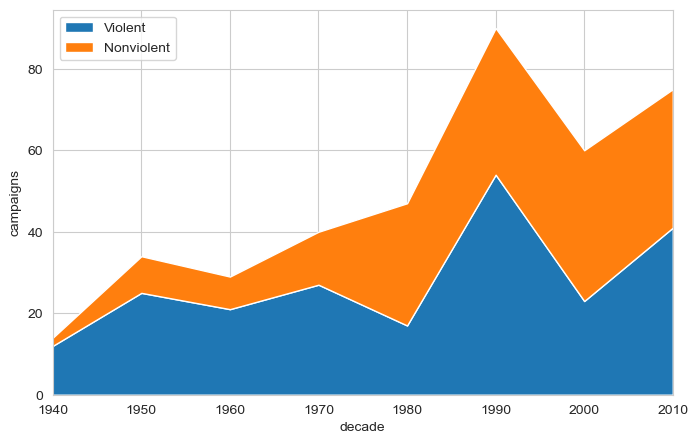

In [13]:
# set seaborn style
sns.set_style('whitegrid')

plt.figure(figsize=(8, 5))

# x = campaign_counts.index = decades
# y1 = campaign_counts.Violent = number of violent campaigns (blue)
# y2 = campaign_counts.Nonviolent = number of nonviolent campaigns (orange)
plt.stackplot(campaign_counts.index, campaign_counts.Violent, campaign_counts.Nonviolent, labels=['Violent', 'Nonviolent'])

# Add a legend to the plot, at the upper left corner
plt.legend(loc='upper left')

# Adjust x-axis limits to remove white space at the start and end
plt.xlim(campaign_counts.index.min(), campaign_counts.index.max())

# Adding labels for each axis
plt.xlabel('decade')
plt.ylabel('campaigns')

# Display the plot
plt.show()

* Moving on to the **second part**.
* We will *create a plot showing, **for each decade from 1940** onwards, **the number of nonviolent campaigns and the percentage of success**. Our plot will have two vertical axes, one for each metric*.
* Now, we only want the nonviolent campaigns.
* Let's examine them!

* We will use the previous `campaign_counts` DataFrame, to get the number of nonviolent campaigns

In [14]:
campaign_counts.Nonviolent

DECADE
1940.0     2
1950.0     9
1960.0     8
1970.0    13
1980.0    30
1990.0    36
2000.0    37
2010.0    34
Name: Nonviolent, dtype: int64

* From these, which where successful ?
* We will return to our primary `navco` DataFrame, to search

In [15]:
# Get the successful, nonviolent, campaigns
filtered_data = navco[(navco['SUCCESS'] == 1) & (navco['NONVIOL'] == 1)]

# Group them by their 'DECADE' and count them
successful_nonviol = filtered_data.groupby('DECADE').size()

successful_nonviol

DECADE
1940.0     1
1950.0     2
1960.0     2
1970.0     7
1980.0    14
1990.0    30
2000.0    25
2010.0    13
dtype: int64

* We know that: **Percentage of Success = ( Number of Successful Nonviolent ) / ( Number of Nonviolent )**
* Let's calculate the new DataFrame, for the plot

In [16]:
succ_perc_nonviol = successful_nonviol / campaign_counts.Nonviolent

# Combine the 'Nonviolent' column from 'campaign_counts' (number of nonviolent campaigns)
# with 'succ_perc_nonviol' Series (percentage of successful nonviolent campaigns).
# Aligning them side by side,  horizontally (axis=1), based on the common index.
new_dt = pd.concat([campaign_counts.Nonviolent, succ_perc_nonviol], axis=1)

# Rename columns for clarity
new_dt.columns = ['Nonviolent', 'Percentage']

new_dt

,Nonviolent,Percentage
DECADE,,
1940.0,2,0.500000
1950.0,9,0.222222
1960.0,8,0.250000
1970.0,13,0.538462
1980.0,30,0.466667
1990.0,36,0.833333
2000.0,37,0.675676
2010.0,34,0.382353


* Let's plot our data!
* Side by side, as in our DataFrame.
    * On the left y-axis the number of `Nonviolent` campaigns.
    * On the right y-axis the `Percentage` of sucessful, nonviolent campaigns .

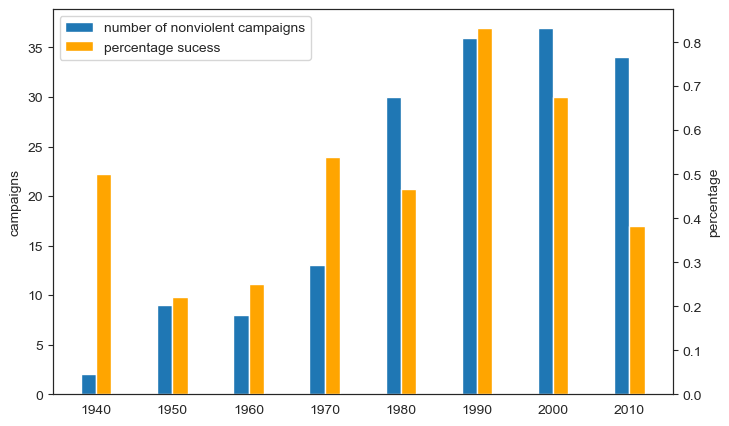

In [17]:
# Set the background to white, to remove the confusing double grid
sns.set_style('white')

# Create a bar chart with grouped bars and twin x-axis
width = 2  # Width of the bars

# Create a figure and an axis with a specified size of (8, 5)
fig, ax = plt.subplots(figsize=(8, 5))

# Left side: number of nonviolent campaigns
# Set the x-coordinates with a slight offset to the left (- width/2), to put the bars side by side
left_bar = ax.bar(new_dt.index - width/2, new_dt['Nonviolent'], width, label='number of nonviolent campaigns') # label for the legend
ax.set_ylabel('campaigns')

# Create a twin x-axis (ax2), same with the original x-axis (ax)
ax2 = ax.twinx()

# Right side: percentage
# Same method for the x-coordinates, but with an offset to the right (+ width/2)
right_bar = ax2.bar(new_dt.index + width/2, new_dt['Percentage'], width, label='percentage sucess', color='orange')
ax2.set_ylabel('percentage')

# Combine the legends from both axes
# Create a list of bars and their corresponding labels for the legend
bars = [left_bar, right_bar]
labels = [bar.get_label() for bar in bars]
ax.legend(bars, labels, loc='upper left')

# Show the plot
plt.show()

* Moving on to **the third** and last part of **"The Exploration of Historical Trends"**.
* Again we will *create a plot showing **the success rate for violent and nonviolent campaigns by decade**. Our plot should show that nonviolent campaigns have higher success probabilities.

* Let's check again the previous `succ_perc_nonviol` Series, the percentage of success for nonviolent campaigns.

In [18]:
succ_perc_nonviol

DECADE
1940.0    0.500000
1950.0    0.222222
1960.0    0.250000
1970.0    0.538462
1980.0    0.466667
1990.0    0.833333
2000.0    0.675676
2010.0    0.382353
dtype: float64

* Wa want to calculate **the same Series, but for violent**.
* So we will approach it the same way as previously.
* Firstly we will find the number of successful, violent campaigns (`successful_viol`)

In [19]:
# For the successful nonviolent campaigns data
filtered_data = navco[(navco['SUCCESS'] == 1) & (navco['NONVIOL'] == 0)]

# Group them by their DECADE and count them
successful_viol = filtered_data.groupby('DECADE').size()

successful_viol

DECADE
1940.0     6
1950.0     8
1960.0     4
1970.0    12
1980.0     5
1990.0    15
2000.0     3
2010.0     3
dtype: int64

* And afterwards, the **percentage of success** (as previously).

In [20]:
succ_perc_viol = successful_viol / campaign_counts.Violent

succ_perc_viol

DECADE
1940.0    0.500000
1950.0    0.320000
1960.0    0.190476
1970.0    0.444444
1980.0    0.294118
1990.0    0.277778
2000.0    0.130435
2010.0    0.073171
dtype: float64

* Lastly, we will combine the two series (`succ_perc_nonviol` & `succ_perc_viol`)
* Side by side, horizontally (axis=1), based on the common `DECADE`.

In [21]:
new_dt = pd.concat([succ_perc_nonviol, succ_perc_viol], axis=1)

new_dt.columns = ['Nonviolent_perc', 'Violent_perc']

new_dt

,Nonviolent_perc,Violent_perc
DECADE,,
1940.0,0.500000,0.500000
1950.0,0.222222,0.320000
1960.0,0.250000,0.190476
1970.0,0.538462,0.444444
1980.0,0.466667,0.294118
1990.0,0.833333,0.277778
2000.0,0.675676,0.130435
2010.0,0.382353,0.073171


* We will plot our data!
* With teo `bar` plots, side by side.
* Showing that **nonviolent campaigns have higher success probabilities**, in general.

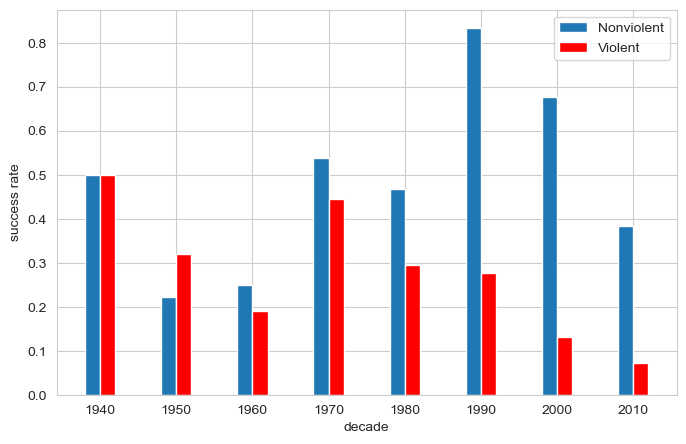

In [22]:
# Bring the grid back
sns.set_style('whitegrid')

# Create a bar chart with grouped bars
width = 2  # Width of the bars
fig, ax = plt.subplots(figsize=(8, 5))

# Left side: Number of Campaigns (Nonviolent)
# Same approach with the offset of the x-coordinates
left_bar = ax.bar(new_dt.index - width/2, new_dt['Nonviolent_perc'], width, label='Nonviolent')

# Right side: Percentage (Violent)
right_bar = ax.bar(new_dt.index + width/2, new_dt['Violent_perc'], width, label='Violent', color='red')

ax.set_ylabel('success rate')
ax.set_xlabel('decade')

# Combine the legends from both bars
ax.legend(loc='upper right')

plt.show()

# 2. Largest Resistance Campaigns, 1946-2014

* In this section, we will *create a horizontal bar plot with **the resistance campaigns**, for all years, **with a percentage of participation at least 2.0%***.
* So, let's filter out all the campaigns with `PERCENTAGEPOPULARPARTICIPATION` < 0.02

In [23]:
over02 = navco[navco["PERCENTAGEPOPULARPARTICIPATION"] > 0.02]
over02

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP,DECADE
4,5.0,Albanian anti-communist,Albania,1990.0,1991.0,Communist regime,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,442.0,300000.0,0.091068,1.0,0.0,0.0,1.0,1.0,0.0,1990.0
14,33.0,pro-democracy movement,Argentina,1977.0,1983.0,military junta,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2415.0,9000000.0,0.302013,1.0,0.0,1.0,0.0,1.0,0.0,1980.0
19,255.0,Anti-King Hamad Campaign,Bahrain,2011.0,2014.0,Monarchy of King Hamad,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1050.0,100000.0,0.063816,1.0,0.0,1.0,0.0,0.0,0.0,2010.0
34,383.0,Brunei Revolt,Brunei,1962.0,1962.0,Brunei government,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,9.0,4000.0,0.044641,1.0,0.0,NaN,0.0,1.0,1.0,1960.0
63,26.0,anti-Pinochet campaign,Chile,1983.0,1989.0,Augusto Pinochet,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2409.0,700000.0,0.054264,1.0,1.0,1.0,0.0,1.0,0.0,1980.0
80,240.0,Velvet Revolution,Czechoslovakia,1989.0,1989.0,Communist regime,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,24.0,500000.0,0.048544,1.0,0.0,0.0,0.0,1.0,0.0,1980.0
87,260.0,Djibouti Arab Spring,Djibouti,2011.0,2011.0,Gov't of Djibouti (President Guelleh),0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,35.0,30000.0,0.034645,1.0,0.0,0.0,0.0,0.0,0.0,2010.0
89,74.0,East German uprising,East Germany,1953.0,1953.0,Communist regime,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,17.0,400000.0,0.022005,1.0,0.0,0.0,0.0,1.0,0.0,1950.0
98,262.0,Anti-Morsi Protests,Egypt,2013.0,2013.0,President Morsi,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9.0,14000000.0,0.155889,1.0,1.0,1.0,0.0,1.0,0.0,2010.0
104,202.0,Singing Revolution,Estonia,1987.0,1991.0,Communist regime,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1459.0,300000.0,0.192146,1.0,0.0,0.0,0.0,1.0,0.0,1990.0


* We don't need all the columns
* For the title of each campaign, we want both `LOCATION` and `TARGET`.
* For the color of the bars we want both `SUCCESS` and `LIMITED`.
* And for a better understanding of the scale, we will add the `PERCENTAGEPOPULARPARTICIPATION`, inside the bars.

In [24]:
# The columns mentioned above
columns_to_keep = ["LOCATION", "TARGET", "SUCCESS", "LIMITED", "PERCENTAGEPOPULARPARTICIPATION"]

# Keep only specified columns
over02 = over02[columns_to_keep]
over02

,LOCATION,TARGET,SUCCESS,LIMITED,PERCENTAGEPOPULARPARTICIPATION
4,Albania,Communist regime,1.0,0.0,0.091068
14,Argentina,military junta,1.0,0.0,0.302013
19,Bahrain,Monarchy of King Hamad,0.0,0.0,0.063816
34,Brunei,Brunei government,0.0,0.0,0.044641
63,Chile,Augusto Pinochet,1.0,0.0,0.054264
80,Czechoslovakia,Communist regime,1.0,0.0,0.048544
87,Djibouti,Gov't of Djibouti (President Guelleh),0.0,0.0,0.034645
89,East Germany,Communist regime,0.0,0.0,0.022005
98,Egypt,President Morsi,1.0,0.0,0.155889
104,Estonia,Communist regime,1.0,0.0,0.192146


* We will modify our DataFrame, to facilitate the visualization
* `campaign`: The title of the campaign, derived by adding `LOCATION` and `TARGET`
* `status`: Three options. It succeedded; it achieved some of its stated goals or it failed.
* `perc`: Just `PERCENTAGEPOPULARPARTICIPATION`, renamed

In [25]:
over02_refined = pd.DataFrame({'campaign': over02["LOCATION"] + ": " + over02["TARGET"]})
over02_refined['status'] = np.select(
    [
        (over02['SUCCESS'] == 1),
        (over02['LIMITED'] == 1),
        (over02['SUCCESS'] == 0)
    ],
    [
        'Campaign succeeded',
        'Campaign achieved major concessions short of full success',
        'Campaign failed'
    ]
)
over02_refined['perc'] = over02["PERCENTAGEPOPULARPARTICIPATION"]
over02_refined

,campaign,status,perc
4,Albania: Communist regime,Campaign succeeded,0.091068
14,Argentina: military junta,Campaign succeeded,0.302013
19,Bahrain: Monarchy of King Hamad,Campaign failed,0.063816
34,Brunei: Brunei government,Campaign failed,0.044641
63,Chile: Augusto Pinochet,Campaign succeeded,0.054264
80,Czechoslovakia: Communist regime,Campaign succeeded,0.048544
87,Djibouti: Gov't of Djibouti (President Guelleh),Campaign failed,0.034645
89,East Germany: Communist regime,Campaign failed,0.022005
98,Egypt: President Morsi,Campaign succeeded,0.155889
104,Estonia: Communist regime,Campaign succeeded,0.192146


* We will sort them in descending order, based on the percentage of participation, from highest to lowest.

In [26]:
over02_sorted = over02_refined.sort_values(by='perc', ascending=False).reset_index(drop=True)
over02_sorted

,campaign,status,perc
0,Slovenia: Yugoslavian rule,Campaign succeeded,0.450129
1,Argentina: military junta,Campaign succeeded,0.302013
2,Zambia: British rule,Campaign succeeded,0.285063
3,Lebanon: Syrian forces,Campaign succeeded,0.250824
4,Lebanon: Government of Prime Minister Fouad Si...,Campaign succeeded,0.194598
5,Estonia: Communist regime,Campaign succeeded,0.192146
6,Tunisia: Council negotiating end to political ...,Campaign succeeded,0.179470
7,Egypt: President Morsi,Campaign succeeded,0.155889
8,Latvia: Communist regime,Campaign succeeded,0.094319
9,Albania: Communist regime,Campaign succeeded,0.091068


* Let's plot our data, in a horizontal bar plot, as mentioned in the beginning

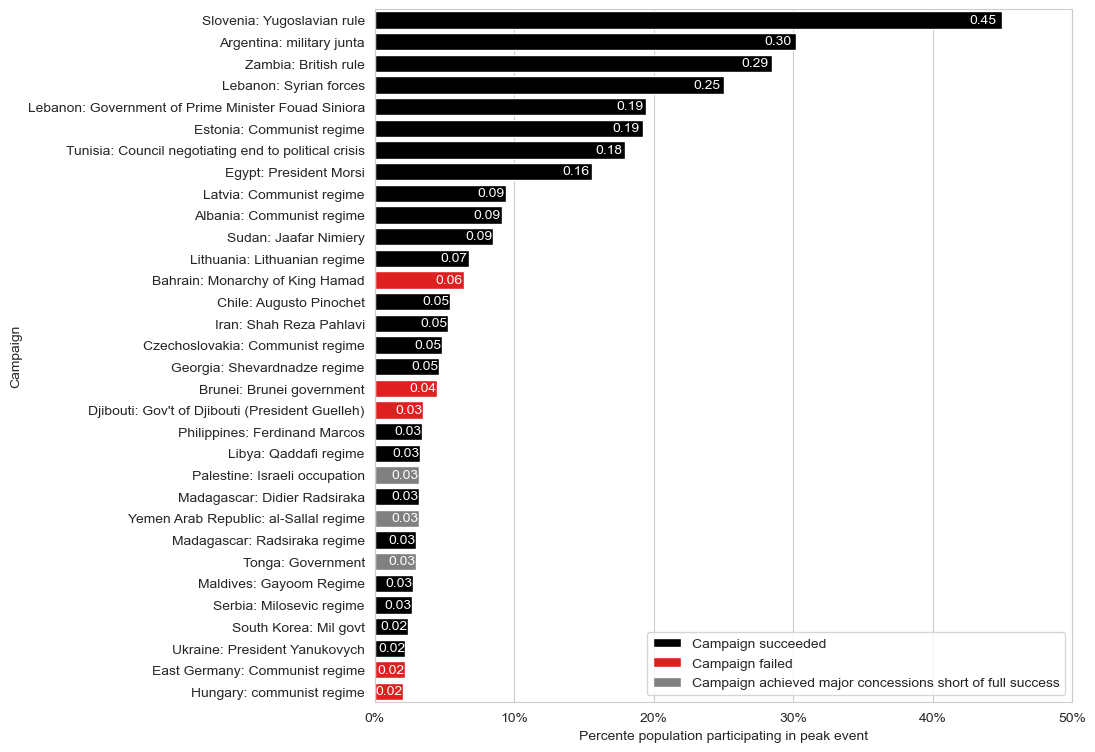

In [27]:
plt.figure(figsize=(9,9))

# Create a horizontal bar plot
ax = sns.barplot(x='perc', y='campaign', hue='status', data=over02_sorted,
                orient='h', palette={'Campaign failed': 'red',
                                     'Campaign achieved major concessions short of full success': 'grey',
                                     'Campaign succeeded': 'black'}, dodge=False) # dodge=False: to overlay bars of different campaign status, on top of each other

# Add perc inside the bar with white text
for container in ax.containers: # Loop over each container in the bar plot (each hue category)
    for bar in container: # Loop over each individual bar within the container
        width = bar.get_width()
        if pd.notna(width):  # Check if width is not NaN
            ax.text((bar.get_x() + width) * 0.99, # Leave some right margin
                    bar.get_y() + bar.get_height() / 2, # Calculate the y-coordinate to place the text at the center of the bar
                    f'{over02_sorted["perc"].iloc[container.index(bar)]:.2f}', # Format and add the percentage value inside the bar
                    color='white', verticalalignment='center', horizontalalignment='right')# with white text
            
# Adjust the legend
ax.legend(loc='lower right')

# Convert x-axis labels to percentages
plt.xticks(ticks=ax.get_xticks(), labels=[f'{int(tick * 100)}%' for tick in ax.get_xticks()])

plt.xlabel('Percente population participating in peak event')
plt.ylabel('Campaign')

plt.show()

* Lastly, before we head to our statistical analysis, let's seach what we can find for Greece!

In [28]:
navco[navco["LOCATION"]=='Greece']

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP,DECADE
119,401.0,Greek Civil War,Greece,1946.0,1949.0,British and US occupation,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1778.0,40000.0,0.005092,1.0,0.0,NaN,0.0,1.0,1.0,1940.0
120,89.0,Greek anti-military,Greece,1973.0,1974.0,Military rule,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,654.0,2500.0,0.000279,1.0,1.0,1.0,0.0,1.0,0.0,1970.0


* We found two major conflicts/campaigns:
    * **The Greek Civil War (1946–1949)**: a conflict **between the communist forces**, primarily led by the Greek Communist Party, **and the Greek government forces**, supported by the US and British, following the end of World War II.
    * **The Greek anti-military movement (1973-1974)**: protests in Greece against the military rule (junta) that ruled the country from 1967 to 1974, marked by widespread civil resistance and demonstrations advocating for the restoration of democracy!<br />A major moment: **The Polytechnic uprising in 1973**, when students at the Athens Polytechnic University staged a massive protest, demanding "Bread! Education! Freedom!", leading to a brutal crackdown by the regime. *The event played a significant role in the eventual fall of the military dictatorship.*

## 3. The Effect of Participation on the Probability of Campaign Success
In this section, we will *examine the effect of participation on the probability of campaign success*.

* For the **first part** we will *run a **logistic regression** for **success** on **membership per capita**, controlling for the **location’s logged population** the year the campaign ends. We will also visualize our predictions with a scatter plot.*

* **success**: we have a column named `SUCCESS`, which is binary and works for the dependent variable of our **logisitc regression**
* **membership per capita**: our first independent variable, we can't find it in `navco`, so we need to calculate it!
    * We searched the [Appendix of the previous version of our data (1.1)](https://gdcc.github.io/dataverse-previewers/previewers/v1.3/PDFPreview.html?fileid=3612096&siteUrl=https://dataverse.harvard.edu&datasetid=3612095&datasetversion=1.0&locale=en), to guide us on how we can calculate it.
    * We found out that **membership per capita** = *lmembers / lnpop*
    * Where (from the same source), 
        * *lmembers = log of peakmembership* = log (`PARTICIPATION`)
        * *lnpop = **Location’s logged population** the year the campaign ends, logged* = log (`PARTICIPATION` / `PERCENTAGEPOPULARPARTICIPATION`)
        * As we already know from the [1.2 Codebook](https://gdcc.github.io/dataverse-previewers/previewers/v1.3/PDFPreview.html?fileid=3621197&siteUrl=https://dataverse.harvard.edu&datasetid=3612156&datasetversion=2.0&locale=en):
            * `PARTICIPATION`: *Number of participants observed actively confronting opponent at highest point (peak event).*
            * `PERCENTAGEPOPULARPARTICIPATION`: *Percent of target’s national population involved in peak event (`PARTICIPATION` / **population**)*
            * So, **population** = `PARTICIPATION` / `PERCENTAGEPOPULARPARTICIPATION`
     * So, **membership per capita** =  log (`PARTICIPATION`) / log(`PARTICIPATION` / `PERCENTAGEPOPULARPARTICIPATION`)
        
* **location’s logged population**: our second independent variable, equals to *lnpop* = log(`PARTICIPATION` / `PERCENTAGEPOPULARPARTICIPATION`)

* let's calculate first the **location’s logged population** (`logged_pop`)

In [29]:
logged_pop = np.log(navco['PARTICIPATION'] / navco['PERCENTAGEPOPULARPARTICIPATION'])
logged_pop

0      16.562781
1      16.496532
2      16.924572
3      17.424293
4      15.007682
         ...    
384    15.070557
385    15.924478
386    16.197288
387    15.745165
388    16.036580
Length: 389, dtype: float64

* And **membership per capita** = `mpc` = log(`PARTICIPATION`) / log(`PARTICIPATION` / `PERCENTAGEPOPULARPARTICIPATION`)

In [30]:
mpc = np.log(navco['PARTICIPATION']) / logged_pop
mpc

0      0.556087
1      0.558320
2      0.585154
3      0.631423
4      0.840339
         ...   
384    0.916722
385    0.630680
386    0.494303
387    0.438722
388    0.531110
Length: 389, dtype: float64

* Let's create a DataFrame, `mpc_succ`
* With the 3 columns we need
    * `mpc`: first independent variable
    * `population`: second independent variable
    * `succ`: the dependent variable, binary

In [31]:
mpc_succ = pd.DataFrame({
    'mpc': mpc,
    'population': logged_pop,
    'succ': navco['SUCCESS']
})
                  
mpc_succ

,mpc,population,succ
0,0.556087,16.562781,1.0
1,0.558320,16.496532,1.0
2,0.585154,16.924572,1.0
3,0.631423,17.424293,0.0
4,0.840339,15.007682,1.0
...,...,...,...
384,0.916722,15.070557,1.0
385,0.630680,15.924478,1.0
386,0.494303,16.197288,1.0
387,0.438722,15.745165,0.0


* Let's check if we have NaN values.
* We don't want them in the regression.

In [32]:
mpc_succ = mpc_succ.dropna()
mpc_succ

,mpc,population,succ
0,0.556087,16.562781,1.0
1,0.558320,16.496532,1.0
2,0.585154,16.924572,1.0
3,0.631423,17.424293,0.0
4,0.840339,15.007682,1.0
...,...,...,...
384,0.916722,15.070557,1.0
385,0.630680,15.924478,1.0
386,0.494303,16.197288,1.0
387,0.438722,15.745165,0.0


* Let's plot our data, to bettter understand them. 

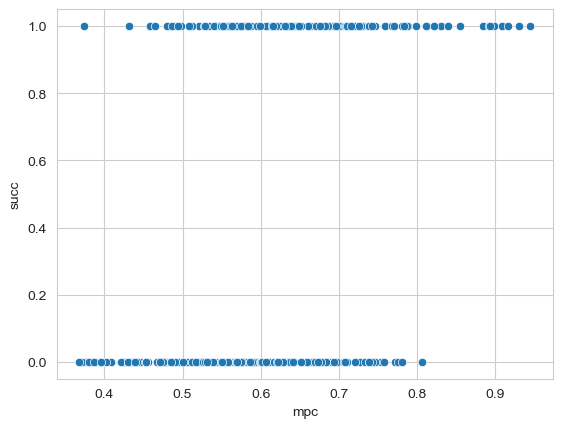

In [33]:
_ = sns.scatterplot(x='mpc', y='succ', data=mpc_succ)

* Everything seems right for the logistic regression!
* From statsmodels, we will use `logit()`, to fit using logistic regression.

In [34]:
from statsmodels.formula.api import logit

participation_logit_mod = logit("succ ~ mpc + population", data=mpc_succ)
participation_logit_res = participation_logit_mod.fit()

participation_logit_res.summary2()

Optimization terminated successfully.
         Current function value: 0.580756
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: succ             Pseudo R-squared: 0.130     
Date:               2023-12-04 19:27 AIC:              447.3747  
No. Observations:   380              BIC:              459.1952  
Df Model:           2                Log-Likelihood:   -220.69   
Df Residuals:       377              LL-Null:          -253.58   
Converged:          1.0000           LLR p-value:      5.1893e-15
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
------------------------------------------------------------------
Intercept      -2.8142    1.4961  -1.8811  0.0600  -5.7465  0.1180
mpc             7.6475    1.1664   6.5563  0.0000   5.3613  9.9336
population     -0.1388    0.0736  -1.8871  0.0591  -0.2830  0.0054
=================================================================

"""

* A pseudo R-squared == 0.130, suggests that the model explains about 13% of the variance in the dependent variables.
* For two variables, it is decent.
* We would prefer it to be between 0.2 and 0.4, but it's ok.

* As for the results of our analysis:
    * **mpc** has a highly significant positive effect on campaign success (p-value < 0.0001), with a coefficient of 7.65.
    * **population** shows a marginally significant negative effect (p-value = 0.0591), implying a slight decrease in success with larger populations.
* **Overall**, the model emphasizes **the importance of mpc**, while suggesting **caution in interpreting the role of population in predicting campaign success, due to **

* Let's now get the predictions of our model!

In [35]:
success_predicted = participation_logit_res.predict(mpc_succ[['mpc', 'population']])

success_predicted

0      0.297174
1      0.302691
2      0.334318
3      0.400291
4      0.821845
         ...   
384    0.891321
385    0.449738
386    0.217118
387    0.161809
388    0.273140
Length: 380, dtype: float64

* We will also *create a scatter plot showing the logged participants per capita, on the x-axis, and the probability of success, on the y-axis*.

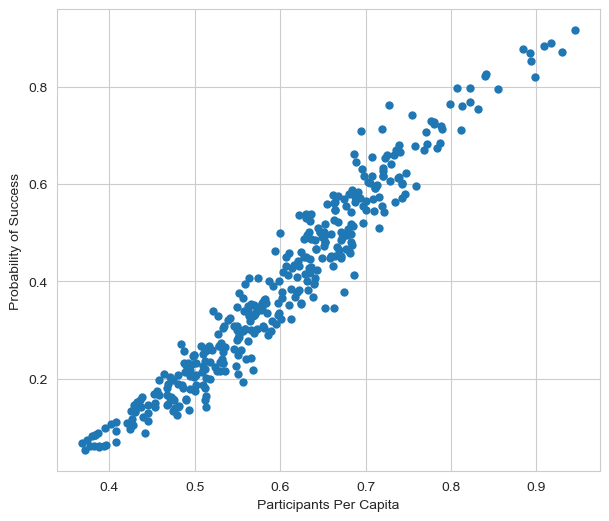

In [36]:
plt.figure(figsize=(7, 6))

sns.scatterplot(x=mpc_succ['mpc'], y=success_predicted, linewidth=0)

plt.xlabel('Participants Per Capita')
plt.ylabel('Probability of Success')

plt.show()

* Each point on the plot represents a unique combination of `mpc` and `population`
* On the x-axis we only chose to show the `mpc`, for a cleaner representation
* On the y-axis it is the predicted probability of success based on our logistic regression model.
* As the percentage of success increases, there is a decreasing frequency of dots/instances, indicating that most campaigns in the dataset have a predicted probability of success < 0.6

* For the **second part**, we will *do **the same two things**, but with **only the membership per capital as dependent variable***.

* So, let's use the same DataFrame, `mpc_succ`.
* But we will only use `mpc` column.

In [37]:
participation_logit_mod2 = logit("succ ~ mpc", data=mpc_succ)
participation_logit_res2 = participation_logit_mod2.fit()

participation_logit_res2.summary2()

Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: succ             Pseudo R-squared: 0.123     
Date:               2023-12-04 19:27 AIC:              449.0222  
No. Observations:   380              BIC:              456.9026  
Df Model:           1                Log-Likelihood:   -222.51   
Df Residuals:       378              LL-Null:          -253.58   
Converged:          1.0000           LLR p-value:      3.2041e-15
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -5.3469    0.7095  -7.5362  0.0000  -6.7375  -3.9563
mpc            8.0495    1.1414   7.0524  0.0000   5.8125  10.2866
=================================================================

"""

* We see a worst pseudo R-squared
* That's reasonable, as the population size is an important factor for a campaign sucess.
* In general, the more people in a country, the more people in the streets. 

* Let's get the predictions, again.

In [38]:
success_predicted2 = participation_logit_res2.predict(mpc_succ['mpc'])

success_predicted2

0      0.295117
1      0.298870
2      0.345998
3      0.434322
4      0.804936
         ...   
384    0.884145
385    0.432853
386    0.202945
387    0.139988
388    0.255078
Length: 380, dtype: float64

* And visualize with a scatterplot.

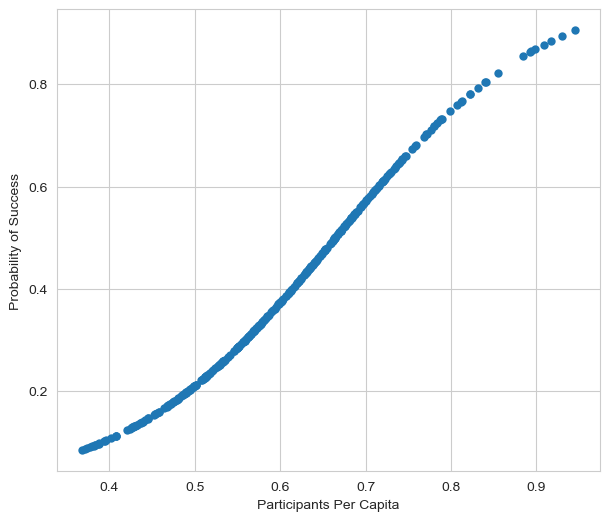

In [39]:
plt.figure(figsize=(7, 6))

sns.scatterplot(x=mpc_succ['mpc'], y=success_predicted2, linewidth=0)

plt.xlabel('Participants Per Capita')
plt.ylabel('Probability of Success')

plt.show()

* That's very different from the previous scatter plot...
* Controlling only for `mpc` simplifies the model, **isolating the impact of mpc on success** without interference from other variables.
* With no other factor influencing the outcome, **the association between mpc and success becomes more evident**, resulting in **a much cleaner sigmoid line**.

## 4. The Level of Participation Tipping Point
In this section we will *create a table of the famous 3.5% rule and we will explain how Chenoweth came up with it. We will also find the percentage of the population that is the tipping point for success in a campaign with 99% probability*

* For the **first part**, we will need to create a new DataFrame, `part_succ`.
* The first column will be the `PERCENTAGEPOPULARPARTICIPATION`.
* And the second, is it was successful (`SUCCESS`==1) or not.

In [40]:
part_succ = pd.DataFrame({
    'perc_part': navco['PERCENTAGEPOPULARPARTICIPATION'],
    'succ': navco['SUCCESS']
})
                      
part_succ

,perc_part,succ
0,0.000641,1.0
1,0.000685,1.0
2,0.000893,1.0
3,0.001625,0.0
4,0.091068,1.0
...,...,...
384,0.285063,1.0
385,0.002791,1.0
386,0.000277,1.0
387,0.000145,0.0


* Let's check for NaN values

In [41]:
part_succ = part_succ.dropna()

part_succ

,perc_part,succ
0,0.000641,1.0
1,0.000685,1.0
2,0.000893,1.0
3,0.001625,0.0
4,0.091068,1.0
...,...,...
384,0.285063,1.0
385,0.002791,1.0
386,0.000277,1.0
387,0.000145,0.0


* Nothing.
* Let's also check for 0 values, in `perc_part`

In [42]:
part_succ = part_succ[part_succ['perc_part'] != 0]
part_succ

,perc_part,succ
0,0.000641,1.0
1,0.000685,1.0
2,0.000893,1.0
3,0.001625,0.0
4,0.091068,1.0
...,...,...
384,0.285063,1.0
385,0.002791,1.0
386,0.000277,1.0
387,0.000145,0.0


* Now, we are good to proceed to creating the table!

* We will divide the `perc_part` column into categorical bins, representing different ranges of popular participation percentages.
    * 0.0035% -> 0.000035
    * 0.015% ->0.00015
    * 0.06% ->0.0006
    * 0.25% -> 0.0025
    * 1% -> 0.01
    * 3.5% -> 0.035
* Afterwards, we will reorder the categories to present them in a logical sequence, from the lowest to the highest participation percentages.

In [43]:
# Create bins for the 'perc_part' column
bins = [-float('inf'), 0.000035, 0.00015, 0.0006, 0.0025, 0.01, 0.035, float('inf')]

# Create labels for each bin
labels = ['less than 0.00035%', '0.00035% - 0.015%', '0.015% - 0.06%', '0.06% - 0.25%', '0.25% - 1.0%', '1.0% - 3.5%', 'greater than 3.5%']

# Add a new column 'perc_part_category' to the DataFrame with the bin categories
part_succ.loc[:, 'perc_part_category'] = pd.cut(part_succ['perc_part'], bins=bins, labels=labels, right=False)

# Reorder the categories
new_order = ['greater than 3.5%', '1.0% - 3.5%', '0.25% - 1.0%', '0.06% - 0.25%', '0.015% - 0.06%', '0.00035% - 0.015%', 'less than 0.00035%']
part_succ.loc[:, 'perc_part_category'] = part_succ['perc_part_category'].cat.reorder_categories(new_order, ordered=True)

part_succ

C:\Users\odysp\AppData\Local\Temp\ipykernel_30340\216426358.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,perc_part,succ,perc_part_category
0,0.000641,1.0,0.06% - 0.25%
1,0.000685,1.0,0.06% - 0.25%
2,0.000893,1.0,0.06% - 0.25%
3,0.001625,0.0,0.06% - 0.25%
4,0.091068,1.0,greater than 3.5%
...,...,...,...
384,0.285063,1.0,greater than 3.5%
385,0.002791,1.0,0.25% - 1.0%
386,0.000277,1.0,0.015% - 0.06%
387,0.000145,0.0,0.00035% - 0.015%


* Then, we will `groupby` the data, based on the new categories (`perc_part_category`)
* And we will calculate the **count of observations** and the **success rate** within each group.
* We will format the percentage, for a better visualization.
* Lastly, we will use the library `tabulate` and use the 'fancy_grid' style, for a cleaner table.

In [44]:
from tabulate import tabulate

# Group by 'perc_part_category' and calculate the number of observations and success rate
result_table = part_succ.groupby('perc_part_category').agg({'perc_part': 'count', 'succ': 'mean'}).reset_index()

# Format the success rate as a percentage with 2 decimals
result_table['succ'] = (result_table['succ'] * 100).round(2).astype(str) + '%'

# Rename columns 
result_table.columns = ['Peak Popular Participation (%)', 'Observations', 'Success Rate']

print(tabulate(result_table, headers='keys', tablefmt='fancy_grid', showindex=False, colalign=('center', 'center', 'center')))

╒══════════════════════════════════╤════════════════╤════════════════╕
│  Peak Popular Participation (%)  │  Observations  │  Success Rate  │
╞══════════════════════════════════╪════════════════╪════════════════╡
│        greater than 3.5%         │       18       │     88.89%     │
├──────────────────────────────────┼────────────────┼────────────────┤
│           1.0% - 3.5%            │       41       │     60.98%     │
├──────────────────────────────────┼────────────────┼────────────────┤
│           0.25% - 1.0%           │       92       │     45.65%     │
├──────────────────────────────────┼────────────────┼────────────────┤
│          0.06% - 0.25%           │       95       │     45.26%     │
├──────────────────────────────────┼────────────────┼────────────────┤
│          0.015% - 0.06%          │       66       │     24.24%     │
├──────────────────────────────────┼────────────────┼────────────────┤
│        0.00035% - 0.015%         │       44       │     9.09%      │
├─────

* Let's move to the **second part**.
* *From the results we obtained in the previous question, the 3rd, we will find the percentage of the population that is the tipping point for success in a campaign with 99% probability.*

* First off, we will use the second model, with one independent variable, **membership per capita**, `mpc` 
* We will create a new DataFrame, `df4`, where:
    * `mpc`: the first column
    * `perc_part`: the second column, `PERCENTAGEPOPULARPARTICIPATION` renamed
    * `succ_perc`: the third column, the perdictions of our second model

In [45]:
df4 = pd.DataFrame({
    'mpc': mpc,
    'perc_part': navco['PERCENTAGEPOPULARPARTICIPATION'],
    'succ_perc': success_predicted2,
})

df4 = df4.dropna()
df4

,mpc,perc_part,succ_perc
0,0.556087,0.000641,0.295117
1,0.558320,0.000685,0.298870
2,0.585154,0.000893,0.345998
3,0.631423,0.001625,0.434322
4,0.840339,0.091068,0.804936
...,...,...,...
384,0.916722,0.285063,0.884145
385,0.630680,0.002791,0.432853
386,0.494303,0.000277,0.202945
387,0.438722,0.000145,0.139988


* We know that:
  $$ p(x) = \frac {1}{1+e^{-(\alpha + \beta x)}} $$
* Where:
    * $p(x)$ = `succ_perc`
    * $x$ = what we are searching
* We want the tipping point where `succ_perc` = $p(x)$ = 0.99 
* We know $α$ and $β$
* We serch for $x_0$ = `mpc` (because the dependant variable of our model is the `mpc`) where $p(x_0) = 0.99$

In [46]:
participation_logit_res2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: succ             Pseudo R-squared: 0.123     
Date:               2023-12-04 19:27 AIC:              449.0222  
No. Observations:   380              BIC:              456.9026  
Df Model:           1                Log-Likelihood:   -222.51   
Df Residuals:       378              LL-Null:          -253.58   
Converged:          1.0000           LLR p-value:      3.2041e-15
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -5.3469    0.7095  -7.5362  0.0000  -6.7375  -3.9563
mpc            8.0495    1.1414   7.0524  0.0000   5.8125  10.2866
=================================================================

"""

* From the table above, we get that for our second model:
    * $α$ = Intercept = -5.3469
    * $β$ = Coefficient = 8.0495
* So:
  $$ 0.99 = \frac {1}{1+e^{-(-5.3469 + 8.0495x)}} $$
* If we solve for x, we get:
    $$x = \frac{\ln\frac{0.99}{1 - 0.99} + 5.3469}{ 8.0495}$$
* $\ln\frac{0.99}{1 - 0.99}$ = 4.59511985013459, so:
    $$x = \frac{4.59511985013459 + 5.3469}{8.0495} = 1.2351102366773823$$

* And we validate with python

In [47]:
(np.log(0.99/0.01) + 5.3469 ) / 8.0495

1.2351102366773823

* So if we put $x = mpc=1.2351102366773823$  in our second model, it should give us 99% probability of sucess (0.99)

In [48]:
# Create a DataFrame with the new_mpc value
new_data = pd.DataFrame({'mpc': [1.2351102366773823]})

# Predict the probability of success using our second logistic regression model
predicted_probability = participation_logit_res2.predict(new_data)

# 'predicted_probability' returns a Series object of 1 line
# So we select by index (index=0)
predicted_probability.iloc[0]

0.9900003355088317

* We got what we expected.
* $mpc = 1.2351102366773823$ **is correct!**

* BUT we want the **percentage of the population**, not the mpc...
* We know from the 3rd question that `mpc` (membership per capita) and `perc_part` (**percentage of the population**) **are connected** with this relationship:
    $$ mpc = \frac{log (percpart)}{log ( population )}$$
* Let's examine the relationship on the graph.
* With blue the `mpc` and orange the `perc_part`

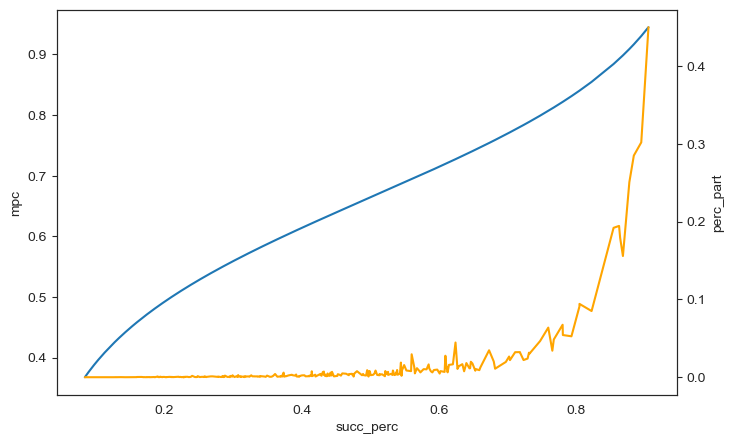

In [49]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(8, 5))

# Left side: mpc
mpc = sns.lineplot(x=df4.succ_perc, y=df4.mpc)

# Create a twin Axes sharing the x-axis
ax2 = ax.twinx()

# Right side: perc_part
perc_part = sns.lineplot(x=df4.succ_perc, y=df4.perc_part, color='orange')

ax.set_xlabel('succ_perc')

plt.show()

* Let's zoom in, for the **20 biggest success percentages**, as we are interested in 99%.

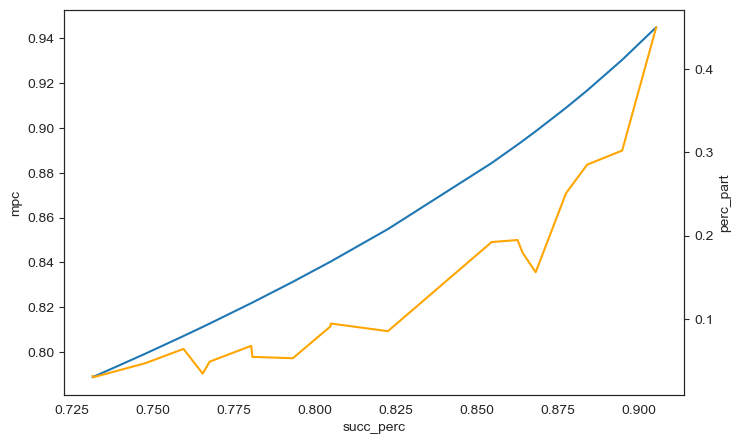

In [50]:
# Sort by sucess percentage & take the the last (biggest, because it's ascending) 20
df4_tail = df4.sort_values(by='succ_perc').tail(20)

sns.set_style('white')
fig, ax = plt.subplots(figsize=(8, 5))

# Left side: Number of Campaigns (Nonviolent)
sns.lineplot(x=df4_tail.succ_perc, y=df4_tail.mpc)

# Create a twin Axes sharing the xaxis
ax2 = ax.twinx()

# Right side: Percentage
sns.lineplot(x=df4_tail.succ_perc, y=df4_tail.perc_part, color='orange')


ax.set_xlabel('succ_perc')

# Show the plot
plt.show()

* It is clear that **they have an increasing relationship**, but not linear.
* Our mpc = 1.23 is out of limits.
* We wil find the max `mpc` and we will assume that they behave respectively.

In [51]:
df4[df4['mpc']==df4['mpc'].max()]

,mpc,perc_part,succ_perc
295,0.944982,0.450129,0.905489


* So for the tipping point of **45% of the population**, the probability of success of a campaign is 99%!

## 5. Nonviolent Resistance, Target Regime Type, Geographical Location
In this section , we will *examine whether nonviolent resistance remains significant even if we control for the regime type.*

*  We will *run a **logistic regression of success** on the **nonviolence indicator** controlling for the **Polity V score** of campaign target, the **log of participation**, and the **location’s logged population** the year the campaign ends.*
* We need to read a second dataset, specifically the [Polity5 Annual Time-Series, 1946-2018](http://www.systemicpeace.org/inscr/p5v2018.xls).
* To read an '.xls' file, we need to download the xlrd library, if we don;t already have it.

In [52]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [53]:
p5 = pd.read_excel('p5v2018.xls')
p5

,p5,cyear,ccode,scode,country,year,flag,fragment,democ,autoc,polity,polity2,durable,xrreg,xrcomp,xropen,xconst,parreg,parcomp,exrec,exconst,polcomp,prior,emonth,eday,eyear,eprec,interim,bmonth,bday,byear,bprec,post,change,d5,sf,regtrans
0,0,7001800,700,AFG,Afghanistan,1800,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1800.0,1.0,-6.0,88.0,1.0,NaN,NaN
1,0,7001801,700,AFG,Afghanistan,1801,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,7001802,700,AFG,Afghanistan,1802,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,7001803,700,AFG,Afghanistan,1803,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,7001804,700,AFG,Afghanistan,1804,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17569,1,5522014,552,ZIM,Zimbabwe,2014,0,0.0,5,1,4,4.0,1.0,2,2,4,5,3,3,7.0,5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17570,1,5522015,552,ZIM,Zimbabwe,2015,0,0.0,5,1,4,4.0,2.0,2,2,4,5,3,3,7.0,5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17571,1,5522016,552,ZIM,Zimbabwe,2016,0,0.0,5,1,4,4.0,3.0,2,2,4,5,3,3,7.0,5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17572,1,5522017,552,ZIM,Zimbabwe,2017,0,0.0,5,1,4,4.0,4.0,2,2,4,5,3,3,7.0,5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Let's check the columns to see what variables we have in our new DataFrame, `p5`
* Alongside, we read the [Codebook](https://www.systemicpeace.org/inscr/p5manualv2018.pdf), to better understand the `polity` score.

In [54]:
p5.columns

Index(['p5', 'cyear', 'ccode', 'scode', 'country', 'year', 'flag', 'fragment',
       'democ', 'autoc', 'polity', 'polity2', 'durable', 'xrreg', 'xrcomp',
       'xropen', 'xconst', 'parreg', 'parcomp', 'exrec', 'exconst', 'polcomp',
       'prior', 'emonth', 'eday', 'eyear', 'eprec', 'interim', 'bmonth',
       'bday', 'byear', 'bprec', 'post', 'change', 'd5', 'sf', 'regtrans'],
      dtype='object')

* We will also check our main `navco`'s columns
* To see where we can merge

In [55]:
navco.columns

Index(['NAVCOID', 'CAMPAIGN', 'LOCATION', 'BYEAR', 'EYEAR', 'TARGET',
       'SUCCESS', 'LIMITED', 'FAILURE', 'ONGOING', 'NONVIOL', 'VIOL',
       'REGCHANGE', 'FSELFDET', 'SECESSION', 'OTHER', 'DURATION',
       'PARTICIPATION', 'PERCENTAGEPOPULARPARTICIPATION', 'REGVIOL', 'DEFECT',
       'VIOLENTFLANK', 'VIOLSIM', 'REGAID', 'STATESUP', 'DECADE'],
      dtype='object')

* As requested, we will merge the two datasets on **location** and **year**.
* **location**:
    * `LOCATION` for `navco`
    * `country` for `p5`
* **year**:
    * `EYEAR` for `navco`
    * `year` for `p5`

* Let's check the **location** variables.

In [56]:
len(navco['LOCATION'].unique())

145

In [57]:
len(p5['country'].unique())

195

* We see that they have different size of locations.
* Let's identify **common and unique locations!**

In [58]:
# Array of unique LOCATION names
navco_cols = navco['LOCATION'].unique()
# Array of unique country names
p5_cols = p5['country'].unique()

# Find common elements
common_countries = np.intersect1d(navco_cols, p5_cols)

# Find unique elements in navco
unique_countries_navco = np.setdiff1d(navco_cols, p5_cols)

# Find unique elements in p5
unique_countries_p5 = np.setdiff1d(p5_cols, navco_cols)

print("Common Countries:", common_countries)
print("Unique Countries in Navco:", unique_countries_navco)
print("Unique Countries in Polity5:", unique_countries_p5)

Common Countries: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus' 'Benin' 'Bolivia' 'Brazil'
 'Bulgaria' 'Burundi' 'Cambodia' 'Cameroon' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Costa Rica' 'Croatia' 'Cuba'
 'Cyprus' 'Czechoslovakia' 'Djibouti' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'France'
 'Georgia' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Honduras' 'Hungary' 'India' 'Indonesia' 'Iran' 'Iraq' 'Israel'
 'Ivory Coast' 'Jordan' 'Kenya' 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon'
 'Liberia' 'Libya' 'Lithuania' 'Macedonia' 'Madagascar' 'Malawi'
 'Malaysia' 'Mali' 'Mauritania' 'Mexico' 'Moldova' 'Mongolia' 'Morocco'
 'Mozambique' 'Namibia' 'Nepal' 'Nicaragua' 'Niger' 'Nigeria' 'Oman'
 'Pakistan' 'Panama' 'Papua New Guinea' 'Paraguay' 'Peru' 'Philippines'
 'Poland' 'Portugal' 'Romania' 'Russia' 'Rwanda' 'Senegal' 'S

* First of all, we will center our changes around `navco` 
* We see that in `navco`'s Unique Countries, some are the same but with a variation in the name
* We will correct them.

In [59]:
navco_rename_dict = {
    'Palestinian Territories': 'Palestine',
    'Zaire/DRC': 'Democratic Republic of Congo',
    'Republic of the Congo': 'Congo-Brazzaville (ROC)',
    'Republic of Yemen': 'Yemen'
}

navco.loc[:, 'LOCATION'] = navco['LOCATION'].replace(navco_rename_dict)

* Let's see if the second list got shorter

In [60]:
# Array of unique LOCATION names
navco_cols = navco['LOCATION'].unique()
# Array of unique country names
p5_cols = p5['country'].unique()

# Find unique elements in navco
unique_countries_navco = np.setdiff1d(navco_cols, p5_cols)

print("Unique Countries in Navco:", unique_countries_navco)

Unique Countries in Navco: ['Aruba' 'Bosnia-Herzegovina' 'Brunei' 'Burma/Myanmar'
 'Congo-Brazzaville (ROC)' 'Democratic Republic of Congo' 'East Germany'
 'East Timor' 'Iceland' 'Maldives' 'Northern Ireland' 'Palestine'
 'Slovakia' 'South Korea' 'Tibet' 'Tonga' 'West Papua' 'Western Sahara'
 'Yemen Arab Republic' "Yemen People's Republic"]


* It has!
* Now, we proceed to search `p5` Unique Countries, to find ones that match `navco`'s, but with different names 
* We will rename the `p5` ones, according to `navco`'s

In [61]:
p5_rename_dict = {
    'Bosnia': 'Bosnia-Herzegovina',
    'Myanmar (Burma)': 'Burma/Myanmar',
    'Congo-Brazzaville': 'Congo-Brazzaville (ROC)',
    'Congo Kinshasa': 'Democratic Republic of Congo',
    'Slovak Republic': 'Slovakia',
    'Korea South': 'South Korea',
    'Germany East': 'East Germany',
    'Timor Leste': 'East Timor',
    'Yemen North': 'Yemen Arab Republic',
    'Yemen South': "Yemen People's Republic"
}

p5.loc[:, 'country'] = p5['country'].replace(p5_rename_dict)

* Let's check if the second list got even smaller.

In [62]:
# Array of unique LOCATION names
navco_cols = navco['LOCATION'].unique()
# Array of unique country names
p5_cols = p5['country'].unique()

# Find unique elements in navco
unique_countries_navco = np.setdiff1d(navco_cols, p5_cols)

print("Unique Countries in Navco:", unique_countries_navco)

Unique Countries in Navco: ['Aruba' 'Brunei' 'Iceland' 'Maldives' 'Northern Ireland' 'Palestine'
 'Tibet' 'Tonga' 'West Papua' 'Western Sahara']


* It has! 
* Now, for the remaining countries, we could not find a match
* After cleansing the data, it's time to merge.

* But first, add a new column in `navco`, the `logged_pop`

In [63]:
navco.loc[:, 'logged_pop'] = logged_pop

C:\Users\odysp\AppData\Local\Temp\ipykernel_30340\422799285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


* Now, merge on **location** and **year**.

In [64]:
merged_data = pd.merge(navco, p5, left_on=['LOCATION', 'EYEAR'], right_on=['country', 'year'])
merged_data

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP,DECADE,logged_pop,p5,cyear,ccode,scode,country,year,flag,fragment,democ,autoc,polity,polity2,durable,xrreg,xrcomp,xropen,xconst,parreg,parcomp,exrec,exconst,polcomp,prior,emonth,eday,eyear,eprec,interim,bmonth,bday,byear,bprec,post,change,d5,sf,regtrans
0,4.0,Afghans,Afghanistan,1978.0,1979.0,Afghan government,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,613.0,10000.0,0.000641,1.0,1.0,NaN,1.0,1.0,1.0,1970.0,16.562781,0,7001979,700,AFG,Afghanistan,1979,0,NaN,-66,-66,-66,NaN,0.0,-66,-66,-66,-66,-66,-66,-66.0,-66,-66.0,NaN,12.0,27.0,1979.0,NaN,-66.0,NaN,NaN,NaN,NaN,NaN,-66.0,NaN,1.0,-66.0
1,3.0,Afghan resistance,Afghanistan,1980.0,1989.0,Soviet occupation,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3281.0,10000.0,0.000685,1.0,0.0,NaN,1.0,0.0,1.0,1980.0,16.496532,0,7001989,700,AFG,Afghanistan,1989,0,NaN,0,8,-8,-8.0,0.0,2,1,4,2,4,1,3.0,2,1.0,-7.0,4.0,16.0,1978.0,3.0,-66.0,2.0,4.0,1989.0,1.0,-8.0,-1.0,1.0,NaN,0.0
2,218.0,Taliban/anti-government forces,Afghanistan,1992.0,1996.0,Afghan regime,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1370.0,20000.0,0.000893,1.0,0.0,NaN,1.0,0.0,0.0,1990.0,16.924572,0,7001996,700,AFG,Afghanistan,1996,0,NaN,0,7,-7,-7.0,0.0,1,0,0,1,4,1,4.0,1,1.0,-8.0,4.0,16.0,1992.0,2.0,-77.0,9.0,27.0,1996.0,9.0,-7.0,1.0,1.0,1.0,0.0
3,217.0,Taliban,Afghanistan,2001.0,2014.0,Afghan government,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4391.0,60000.0,0.001625,1.0,1.0,NaN,1.0,1.0,0.0,2010.0,17.424293,0,7002014,700,AFG,Afghanistan,2014,0,2.0,1,2,-1,-1.0,0.0,2,1,4,4,1,0,3.0,4,4.0,-7.0,10.0,7.0,2001.0,1.0,-66.0,12.0,29.0,2014.0,2.0,-1.0,6.0,1.0,NaN,1.0
4,5.0,Albanian anti-communist,Albania,1990.0,1991.0,Communist regime,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,442.0,300000.0,0.091068,1.0,0.0,0.0,1.0,1.0,0.0,1990.0,15.007682,1,3391991,339,ALB,Albania,1991,0,NaN,-88,-88,-88,3.0,0.0,-88,-88,-88,-88,-88,-88,-88.0,-88,-88.0,NaN,6.0,11.0,1991.0,1.0,-88.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,78.0,FLNC,Democratic Republic of Congo,1977.0,1978.0,DRC/Zaire regime,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,293.0,4000.0,0.000151,1.0,0.0,NaN,0.0,0.0,0.0,1970.0,17.092655,0,4901978,490,ZAI,Democratic Republic of Congo,1978,0,NaN,0,9,-9,-9.0,12.0,2,1,4,1,4,1,3.0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,189.0,Sacred Union,Democratic Republic of Congo,1991.0,1993.0,Mobutu regime,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,864.0,1000.0,0.000026,1.0,0.0,NaN,1.0,0.0,0.0,1990.0,17.474796,0,4901993,490,ZAI,Democratic Republic of Congo,1993,0,NaN,-77,-77,-77,0.0,0.0,-77,-77,-77,-77,-77,-77,-77.0,-77,-77.0,NaN,NaN,NaN,NaN,NaN,-77.0,NaN,NaN,NaN,NaN,NaN,-77.0,NaN,1.0,-77.0
337,248.0,Zambia anti-single party rule,Zambia,1990.0,1991.0,One-party rule,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,488.0,23000.0,0.002791,1.0,0.0,0.0,1.0,0.0,0.0,1990.0,15.924478,0,5511991,551,ZAM,Zambia,1991,0,NaN,6,0,6,6.0,0.0,3,3,4,5,2,3,8.0,5,7.0,-9.0,11.0,1.0,1991.0,1.0,NaN,11.0,2.0,1991.0,1.0,6.0,15.0,1.0,NaN,3.0
338,12.0,anti-Chiluba campaign,Zambia,2001.0,2001.0,Chiluba regime,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,213.0,3000.0,0.000277,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,16.197288,0,5512001,551,ZAM,Zambia,2001,0,0.0,5,0,5,5.0,0.0,2,2,4,5,2,3,7.0,5,7.0,1.0,12.0,27.0,2001.0,1.0,NaN,12.0,28.0,2001.0,1.0,5.0,4.0,1.0,NaN,1.0


* So, as said before, we will *run a **logistic regression of success** on the **nonviolence indicator** controlling for the **Polity V score** of campaign target, the **log of participation**, and the **location’s logged population** the year the campaign ends.*
    * `NONVIOL`: ***the nonviolenve indicator***.
    * `polity2`: ***Polity V score***<br />*after reading the Codebook, we concluded that the updated version (`polity2`) is better from the original (`polity`) because it filters out unwanted information and makes the regression more efficient*.
    * `PARTICIPATION`:  ***log of participation***.
    * `logged_pop`: ***location’s logged population***
    * `SUCCESS`: ***logistic regression of success***

In [65]:
selected_columns = ['NONVIOL', 'polity2', 'PARTICIPATION', 'logged_pop','SUCCESS']

# lr_data = logistic regression DataFrame, with only the selected columns
lr_data = merged_data[selected_columns]

# Drop rows with missing values
lr_data = lr_data.dropna()
lr_data

,NONVIOL,polity2,PARTICIPATION,logged_pop,SUCCESS
1,0.0,-8.0,10000.0,16.496532,1.0
2,0.0,-7.0,20000.0,16.924572,1.0
3,0.0,-1.0,60000.0,17.424293,0.0
4,1.0,3.0,300000.0,15.007682,1.0
5,0.0,-8.0,39000.0,16.213406,1.0
...,...,...,...,...,...
335,0.0,-9.0,4000.0,17.092655,0.0
336,0.0,0.0,1000.0,17.474796,0.0
337,1.0,6.0,23000.0,15.924478,1.0
338,1.0,5.0,3000.0,16.197288,1.0


* We will create another logistic regression model, as mentioned
* The procedure is the same as before

In [66]:
# Fit logistic regression model
nonviol_logit_mod = logit('SUCCESS ~ NONVIOL + polity2 + np.log(PARTICIPATION) + logged_pop', data=lr_data)
nonviol_logit_res = nonviol_logit_mod.fit()

nonviol_logit_res.summary2()

Optimization terminated successfully.
         Current function value: 0.537304
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Method:            MLE       
Dependent Variable:   SUCCESS           Pseudo R-squared:  0.195     
Date:                 2023-12-04 19:27  AIC:               354.9494  
No. Observations:     321               BIC:               373.8066  
Df Model:             4                 Log-Likelihood:    -172.47   
Df Residuals:         316               LL-Null:           -214.13   
Converged:            1.0000            LLR p-value:       3.4736e-17
No. Iterations:       6.0000            Scale:             1.0000    
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Intercept              2.4562   1.4834  1.6558 0.0978 -0.4512  5.3635
NONVIOL                0.8789   0.2878  3.0539 0.0023  0.3148  1.4430
polity2                0.0576   0.0245  2.3539 0.0186  0.0096  0.1056
np.log(PARTICIPATION)  0.3941   0.0857  4.6006 0.0000  0.2262  0.5619
logged_pop            -0.4394   0.0974 -4.5105 0.0000 -0.6303 -0.2485
=====================================================================

"""

* Pseudo R-squared = 0.195, the model is reliable.
* We wanted to examine **whether nonviolent resistance remains significant** even if we control for the regime type.
* So we are only interested in `NONVIOL` row.

* We see that `NONVIOL`:
    * **Coefficient = 0.8789**
    * **P>|z| = p-value = 0.0023**

* **Coefficient = 0.8789** indicates that:
    * Holding all other variables constant, campaigns classified as nonviolent (`NONVIOL`==1)
    * Increase the odds-ratio by $e^{0.8789} \approx 2.4082$ or the odds about **141%**, *compared to campaigns classified as violent (`NONVIOL`==0).*
* The statistically significant **p-value = 0.0023**:
    *  Is **less than 0.05**!<br />In *statistical terms*, this means that the effect of `NONVIOL` on the odds of success is considered statistically significant.<br />In *simpler words*, it suggests that the relationship between `NONVIOL` and the likelihood of success is not likely due to random chance, **there seems to be a real association**.
* So, both indicate that **nonviolent resistance remains significant even if we control for the regime type!**.